## ⚠️ Legal Disclaimer:
This study is prepared solely for education, analysis practice and portfolio display purposes. None of the information it contains constitutes 
financial consultancy or investment advice. All data used is obtained from publicly available sources and its accuracy is not guaranteed. Please consult your financial advisor for real investment decisions.
---

## Cryptocurrency Data Fetching Project with CoinGecko API

In this project, the CoinGecko API was used to retrieve current price data for the 10 cryptocurrencies with the highest market value.

- API used: https://www.coingecko.com/en/api/documentation
- Does not require an API key.

In [3]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import re
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

### Retrieve Data from CoinGecko API

A request is sent to the CoinGecko API in this cell. The top 10 coins with the highest market value are withdrawn in USD with the parameters.

### Converting Data to DataFrame

The JSON data coming from the API is tabulated using pandas. Only the following columns are taken for analysis:
- `id`: Coin ID
- `symbol`: Abbreviation
- `name`: Name
- `current_price`: Current price (USD)
- `market_cap`: Market value
- `price_change_percentage_24h`: 24-hour price change

In [6]:
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 10,
    "page": 1,
    "sparkline": False
}

response = requests.get(url, params=params)
data = response.json()

In [7]:
df = pd.DataFrame(data)
df.head(10)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,109473.000000,2177493287460,1,2177493287460,32172847487,109563.000000,...,1.988649e+07,2.100000e+07,111814.000000,-2.03847,2025-05-22T18:41:28.492Z,67.810000,1.614344e+05,2013-07-06T00:00:00.000Z,None,2025-07-02T17:34:09.632Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,2579.890000,311476281510,2,311476281510,17757149464,2580.890000,...,1.207174e+08,NaN,4878.260000,-47.32698,2021-11-10T14:24:19.604Z,0.432979,5.933533e+05,2015-10-20T00:00:00.000Z,"{'times': 30.52544130141145, 'currency': 'btc'...",2025-07-02T17:34:07.873Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.000000,157892100644,3,157892100644,53488671468,1.000000,...,1.578262e+11,NaN,1.320000,-24.38270,2018-07-24T00:00:00.000Z,0.572521,7.475148e+01,2015-03-02T00:00:00.000Z,None,2025-07-02T17:34:08.041Z
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.260000,133494258343,4,226208492361,3319676976,2.270000,...,9.998599e+10,1.000000e+11,3.400000,-33.37704,2018-01-07T00:00:00.000Z,0.002686,8.418794e+04,2014-05-22T00:00:00.000Z,None,2025-07-02T17:34:07.786Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,663.650000,96821556615,5,96821556615,694253461,664.550000,...,1.458876e+08,2.000000e+08,788.840000,-15.81819,2024-12-04T10:35:25.220Z,0.039818,1.667658e+06,2017-10-19T00:00:00.000Z,None,2025-07-02T17:34:07.157Z
5,solana,sol,Solana,https://coin-images.coingecko.com/coins/images...,152.790000,81702607989,6,92354264743,3686952955,153.390000,...,6.043060e+08,NaN,293.310000,-47.78672,2025-01-19T11:15:27.957Z,0.500801,3.048055e+04,2020-05-11T19:35:23.449Z,None,2025-07-02T17:34:06.850Z
6,usd-coin,usdc,USDC,https://coin-images.coingecko.com/coins/images...,0.999864,61719026474,7,61719984153,8965509701,0.999925,...,6.173204e+10,NaN,1.170000,-14.73966,2019-05-08T00:40:28.300Z,0.877647,1.392435e+01,2023-03-11T08:02:13.981Z,None,2025-07-02T17:34:07.127Z
7,tron,trx,TRON,https://coin-images.coingecko.com/coins/images...,0.281552,26687652732,8,26687695051,444053313,0.282638,...,9.479056e+10,NaN,0.431288,-34.71471,2024-12-04T00:10:40.323Z,0.001804,1.550502e+04,2017-11-12T00:00:00.000Z,"{'times': 147.18534812038533, 'currency': 'usd...",2025-07-02T17:34:06.778Z
8,dogecoin,doge,Dogecoin,https://coin-images.coingecko.com/coins/images...,0.171901,25778204270,9,25785432675,1091039563,0.172217,...,1.499310e+11,NaN,0.731578,-76.47337,2021-05-08T05:08:23.458Z,0.000087,1.979532e+05,2015-05-06T00:00:00.000Z,None,2025-07-02T17:34:08.113Z
9,staked-ether,steth,Lido Staked Ether,https://coin-images.coingecko.com/coins/images...,2579.380000,23471973522,10,23471973522,13375243,2581.270000,...,9.099348e+06,NaN,4829.570000,-46.73932,2021-11-10T14:40:47.256Z,482.900000,4.326739e+02,2020-12-22T04:08:21.854Z,None,2025-07-02T17:34:08.644Z


### Data Discovery (EDA)

In this cell, the structure of the data is examined. It is understood which columns there are, what the data types are, whether there is missing data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10 non-null     object 
 1   symbol                            10 non-null     object 
 2   name                              10 non-null     object 
 3   image                             10 non-null     object 
 4   current_price                     10 non-null     float64
 5   market_cap                        10 non-null     int64  
 6   market_cap_rank                   10 non-null     int64  
 7   fully_diluted_valuation           10 non-null     int64  
 8   total_volume                      10 non-null     int64  
 9   high_24h                          10 non-null     float64
 10  low_24h                           10 non-null     float64
 11  price_change_24h                  10 non-null     float64
 12  price_chang

### Statistical Summary: df.describe()

This cell takes the basic statistical summary values ​​for numerical data:

- `count`: How many data are there
- `mean`: Average
- `std`: Standard deviation
- `min` and `max`: Minimum and maximum value
- `%25`, `%50`, `%75`: Quartile values ​​(provides an idea about the data distribution)

For example, the average value of the `current_price` variable is seen as 11,246 USD.

In [11]:
df.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,10.000000,1.000000e+01,10.00000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,3.000000e+00,10.000000,10.000000,10.000000,1.000000e+01
mean,11545.342332,3.096537e+11,5.50000,3.199911e+11,1.216335e+10,11554.782478,11098.207546,361.419703,3.383944,9.639337e+09,3.382450,5.240724e+10,5.651657e+10,3.340700e+10,12261.103287,-34.339716,55.313834,2.751094e+05
std,34424.089192,6.619985e+11,3.02765,6.594857e+11,1.776025e+10,34452.398882,33149.100980,1029.202849,2.727170,2.021231e+10,2.687514,6.341096e+10,6.518425e+10,5.767130e+10,35034.672571,21.471622,151.729270,5.217283e+05
min,0.171901,2.347197e+10,1.00000,2.347197e+10,1.337524e+07,0.172217,0.157198,0.000048,0.004770,1.077420e+08,0.093760,9.099348e+06,9.099348e+06,2.100000e+07,0.431288,-76.473370,0.000087,1.392435e+01
25%,0.999898,3.544550e+10,3.25000,3.544577e+10,7.934500e+08,0.999944,0.999854,0.005265,1.415530,5.452736e+08,1.408467,1.270099e+08,1.270099e+08,1.105000e+08,1.207500,-47.180065,0.011969,4.200760e+03
50%,77.525000,8.926208e+10,5.50000,9.458791e+10,3.503315e+09,77.830000,73.805000,2.435658,3.168100,2.187945e+09,3.108455,2.977008e+10,3.116817e+10,2.000000e+08,148.355000,-34.045875,0.466890,5.733425e+04
75%,2100.447500,1.517926e+11,7.75000,2.091294e+11,1.555924e+10,2101.805000,1955.200000,119.130000,5.547828,3.736437e+09,5.516360,8.652558e+10,9.868713e+10,5.010000e+10,3819.387500,-17.959318,0.801365,1.888235e+05
max,109473.000000,2.177493e+12,10.00000,2.177493e+12,5.348867e+10,109563.000000,105402.000000,3285.130000,7.916260,6.504976e+10,7.924520,1.578262e+11,1.578262e+11,1.000000e+11,111814.000000,-2.038470,482.900000,1.667658e+06


### Display All Column Names: df.columns

This cell lists all the column names of the data coming from the API.

With these steps, we can see which columns are available and which ones will be useful for analysis.

For example:
- `price_change_24h`
- `market_cap`
- `total_volume`
columns like these can be used in analysis.

In [13]:
df.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

### Selecting Necessary Columns for Analysis

In this cell, only the necessary columns from the data are selected and a new DataFrame is created:

- `id`: Coin name
- `symbol`: Symbol (such as BTC, ETH)
- `current_price`: Current price
- `market_cap`: Market value
- `price_change_percentage_24h`: 24-hour price percentage change

Thanks to this filtering, only the data necessary for analysis is worked with.

In [15]:
df = df[['id', 'symbol', 'name', 'current_price', 'market_cap', 'price_change_percentage_24h']]
df.head()

,id,symbol,name,current_price,market_cap,price_change_percentage_24h
0,bitcoin,btc,Bitcoin,109473.00,2177493287460,3.09371
1,ethereum,eth,Ethereum,2579.89,311476281510,6.31201
2,tether,usdt,Tether,1.00,157892100644,0.02426
3,ripple,xrp,XRP,2.26,133494258343,3.25528
4,binancecoin,bnb,BNB,663.65,96821556615,2.63086


### Converting Column Names to Lower Case

In this step, all column names in the dataset are converted to lower case to make them more consistent and easy to use.

For example:
- `Price_Change_24h` → `price_change_24h`

In [17]:
df.columns = df.columns.str.lower()

### Cleaning Missing Data

In this cell, rows with missing (NaN) values ​​are completely removed from the data set.

This prevents erroneous results from being obtained during analysis.

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

id                             0
symbol                         0
name                           0
current_price                  0
market_cap                     0
price_change_percentage_24h    0
dtype: int64

### Top 5 Coins (Based on Market Cap)

This cell lists the top 5 coins with the highest market cap according to the `market_cap` column.

Used to rank cryptocurrencies by popularity and size.

In [22]:
df.nlargest(5, 'market_cap')

,id,symbol,name,current_price,market_cap,price_change_percentage_24h
0,bitcoin,btc,Bitcoin,109473.00,2177493287460,3.09371
1,ethereum,eth,Ethereum,2579.89,311476281510,6.31201
2,tether,usdt,Tether,1.00,157892100644,0.02426
3,ripple,xrp,XRP,2.26,133494258343,3.25528
4,binancecoin,bnb,BNB,663.65,96821556615,2.63086


## The Coins That Gained and Fell the Most in the Last 24 Hours

In this analysis, according to the percentage price change in the last 24 hours:

- The top 5 coins that gained the most value (rose) are listed from largest to smallest using `ascending=False`.

- The top 5 coins that lost the most value (fall) are listed from smallest to largest using `ascending=True` (or the default).

In this way, it is possible to observe sudden changes in the market and examine short-term investment opportunities.

In [24]:
top_rising = df.sort_values("price_change_percentage_24h", ascending=False).head(5)
top_rising


,id,symbol,name,current_price,market_cap,price_change_percentage_24h
8,dogecoin,doge,Dogecoin,0.171901,25778204270,7.91626
9,staked-ether,steth,Lido Staked Ether,2579.380000,23471973522,6.34938
1,ethereum,eth,Ethereum,2579.890000,311476281510,6.31201
3,ripple,xrp,XRP,2.260000,133494258343,3.25528
5,solana,sol,Solana,152.790000,81702607989,3.24249


In [25]:
top_falling = df.sort_values("price_change_percentage_24h").head(5)
top_falling


,id,symbol,name,current_price,market_cap,price_change_percentage_24h
6,usd-coin,usdc,USDC,0.999864,61719026474,0.00477
2,tether,usdt,Tether,1.000000,157892100644,0.02426
7,tron,trx,TRON,0.281552,26687652732,1.01042
4,binancecoin,bnb,BNB,663.650000,96821556615,2.63086
0,bitcoin,btc,Bitcoin,109473.000000,2177493287460,3.09371


## Visualization of the 5 Coins That Gained the Most in the Last 24 Hours

The chart below shows the 5 cryptocurrencies that have shown the highest price increases in the last 24-hour period.

- A bar chart was created with the `Seaborn` library.
- The percentage price changes of the coins were analyzed using the `price_change_percentage_24h` column.
- The coin names were made readable with the `plt.xticks(rotation=45)` command.

Thanks to this visualization, investors can quickly see the coins that gained the most value in the short term.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Dogecoin'),
  Text(1, 0, 'Lido Staked Ether'),
  Text(2, 0, 'Ethereum'),
  Text(3, 0, 'XRP'),
  Text(4, 0, 'Solana')])

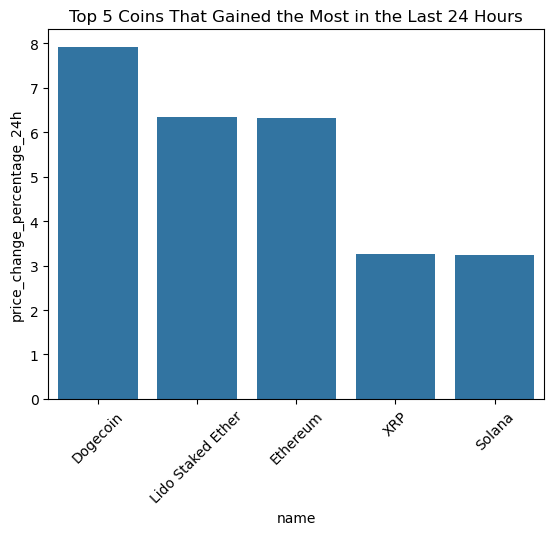

In [27]:
sns.barplot(x="name", y="price_change_percentage_24h", data=top_rising)
plt.title("Top 5 Coins That Gained the Most in the Last 24 Hours")
plt.xticks(rotation=45)


### Visualization: Coin Prices

This chart visually compares the current prices of the top 10 coins in USD.

In [29]:
print(df.columns)

Index(['id', 'symbol', 'name', 'current_price', 'market_cap',
       'price_change_percentage_24h'],
      dtype='object')


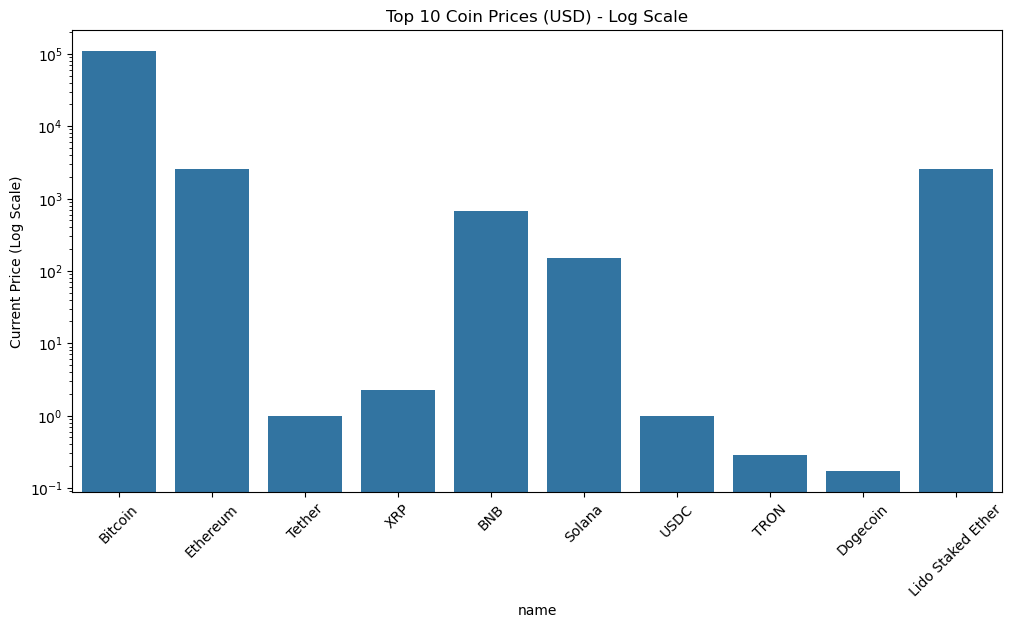

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.head(10), x='name', y='current_price')
plt.yscale("log")  # logarithmic y-axis
plt.title("Top 10 Coin Prices (USD) - Log Scale")
plt.xticks(rotation=45)
plt.ylabel("Current Price (Log Scale)")
plt.show()

## Relationship Between MarketCap and Coin Price

This visualization analyzes the relationship between the market cap (`market_cap`) and the current price (`current_price`) of each cryptocurrency.

- A scatter plot was created with the `Seaborn` library.
- Purpose: To observe whether coins with higher market caps are more expensive in terms of price.
- `x` axis: Market Cap (Market Value)
- `y` axis: Current Price (USD)
- How the prices of different coins are distributed according to their market cap is visualized.
- If necessary, it can be made more readable with `plt.xscale("log")` (if there are very large values).

This analysis helps to understand the correlation between the coin's market cap and its price in investment decisions.

Text(0.5, 1.0, 'MarketCap and Price Relationship')

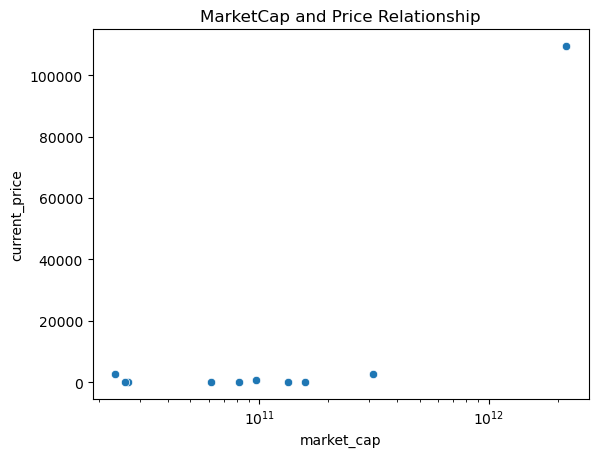

In [32]:
sns.scatterplot(x="market_cap", y="current_price", data=df)
plt.xscale("log")
plt.title("MarketCap and Price Relationship")

## Correlation Matrix Analysis
Correlation matrix measures the strength and direction of linear relationships between variables.

Thanks to this analysis, we can see how much variables such as current_price, market_cap, total_volume are related to each other.

+1 → Positive strong relationship

0 → No relationship

-1 → Negative strong relationship

We created the correlation matrix with the following steps:

A correlation matrix containing only numerical variables was created.

Visualization (heatmap) was done with the Seaborn library.

Thanks to the color transitions in the visual, high and low correlations became easily noticeable.

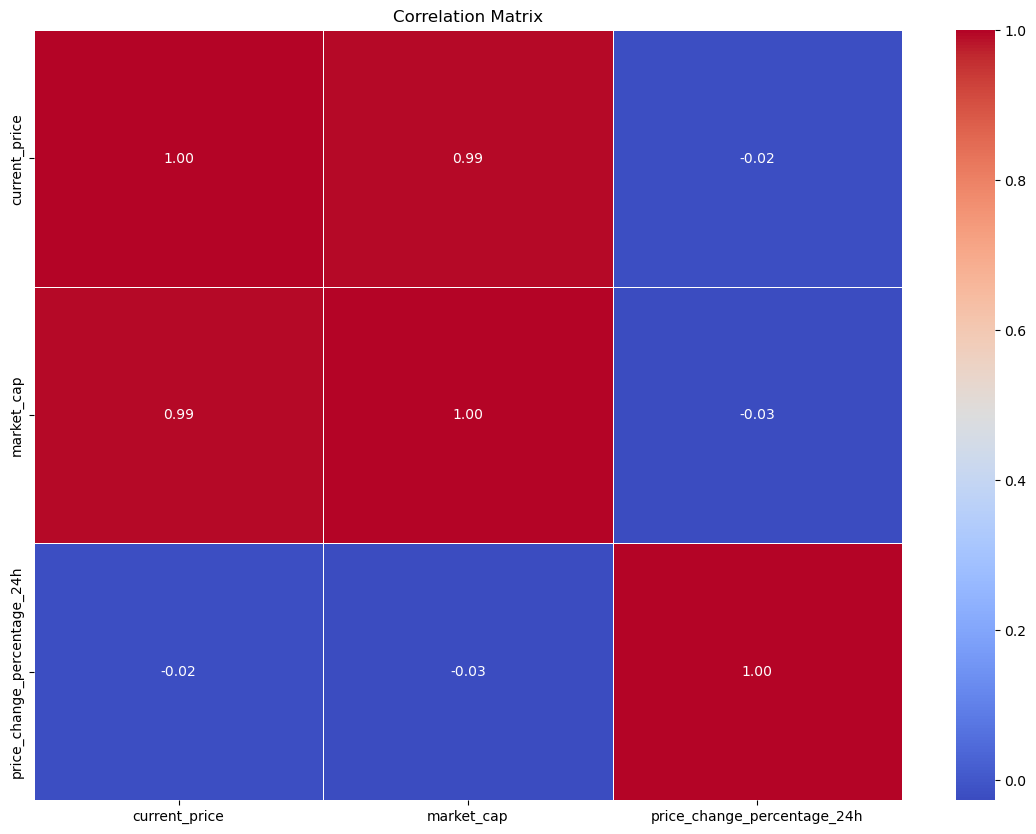

In [34]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Saving Data to CSV File

With the code below, the cryptocurrency data retrieved and cleaned from the CoinGecko API is saved to a file named `coin_data.csv`.

- Thanks to the `index=False` parameter, the sequence number (index column) that pandas adds by default is not written to the CSV file.
- This file can be used to export analysis results and use them in other projects.

In [36]:
df.to_csv("coin_data.csv", index=False)

## Retrieving Coin Details (Example: Bitcoin)

In this step, information about a specific coin (example: Bitcoin) is retrieved using the CoinGecko API's `coins/{id}` endpoint.

Some of the information that can be retrieved:
- Description (`description`)
- Categories (`categories`)
- Total supply (`total_supply`)
- Community information (Twitter followers, Reddit subscribers, etc.)

This information is used to analyze the coin's social impact, technical development, and investor interest.

In [38]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin"
response = requests.get(url)
btc_data = response.json()

# Description
description = btc_data.get("description", {}).get("en", "No description found.")
print("Description:\n", description[:500])

# Twitter Follower Count (if missing, write "No data")
twitter_followers = btc_data.get("community_data", {}).get("twitter_followers", "No Data")
print("\nTwitter Followers:", twitter_followers)

# Total Supply
total_supply = btc_data.get("market_data", {}).get("total_supply", "No Data")
print("Total Supply:", total_supply)

# Categories
categories = btc_data.get("categories", [])
print("Categories:", categories if categories else "No Category")


Description:
 Bitcoin is the first successful internet money based on peer-to-peer technology; whereby no central bank or authority is involved in the transaction and production of the Bitcoin currency. It was created by an anonymous individual/group under the name, Satoshi Nakamoto. The source code is available publicly as an open source project, anybody can look at it and be part of the developmental process.

Bitcoin is changing the way we see money as we speak. The idea was to produce a means of exchang

Twitter Followers: No Data
Total Supply: 19886493.0
Categories: ['Smart Contract Platform', 'Layer 1 (L1)', 'FTX Holdings', 'Proof of Work (PoW)', 'Bitcoin Ecosystem', 'GMCI 30 Index', 'GMCI Index', 'Coinbase 50 Index']


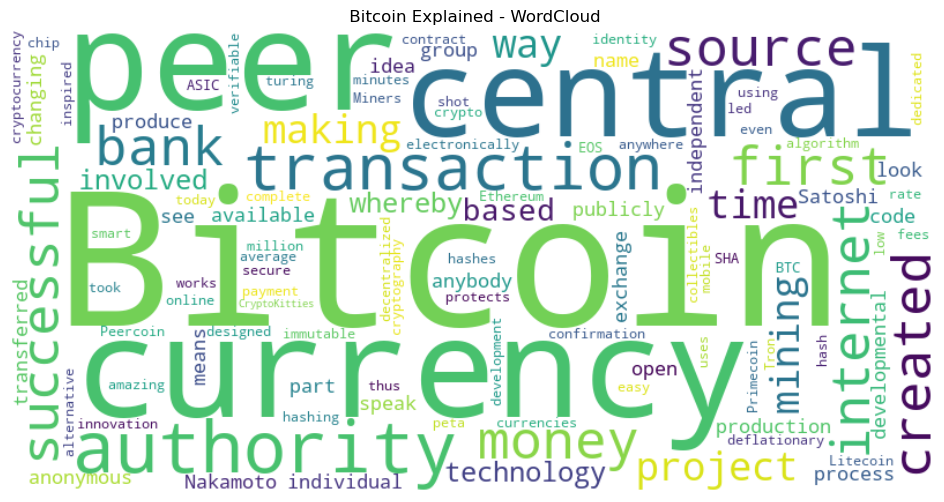

In [39]:
text = btc_data.get("description", {}).get("en", "")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" Bitcoin Explained - WordCloud")
plt.show()


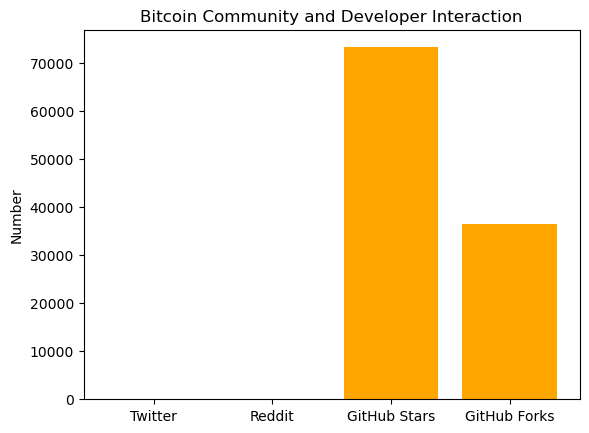

In [40]:
twitter = btc_data.get("community_data", {}).get("twitter_followers", 0)
reddit = btc_data.get("community_data", {}).get("reddit_subscribers", 0)
stars = btc_data.get("developer_data", {}).get("stars", 0)
forks = btc_data.get("developer_data", {}).get("forks", 0)

labels = ['Twitter', 'Reddit', 'GitHub Stars', 'GitHub Forks']
values = [twitter, reddit, stars, forks]

plt.bar(labels, values, color='orange')
plt.title("Bitcoin Community and Developer Interaction")
plt.ylabel("Number")
plt.show()

In [41]:
print("Bitcoin:", ", ".join(btc_data.get("categories", [])))

Bitcoin: Smart Contract Platform, Layer 1 (L1), FTX Holdings, Proof of Work (PoW), Bitcoin Ecosystem, GMCI 30 Index, GMCI Index, Coinbase 50 Index


In [42]:
max_supply = btc_data.get("market_data", {}).get("max_supply", None)
circulating_supply = btc_data.get("market_data", {}).get("circulating_supply", None)

print(" Maximum Supply:", max_supply)
print(" Circulating Supply:", circulating_supply)

if max_supply and circulating_supply:
    oran = (circulating_supply / max_supply) * 100
    print(f" Circulation Rate: %{oran:.2f}")

 Maximum Supply: 21000000.0
 Circulating Supply: 19886493.0
 Circulation Rate: %94.70


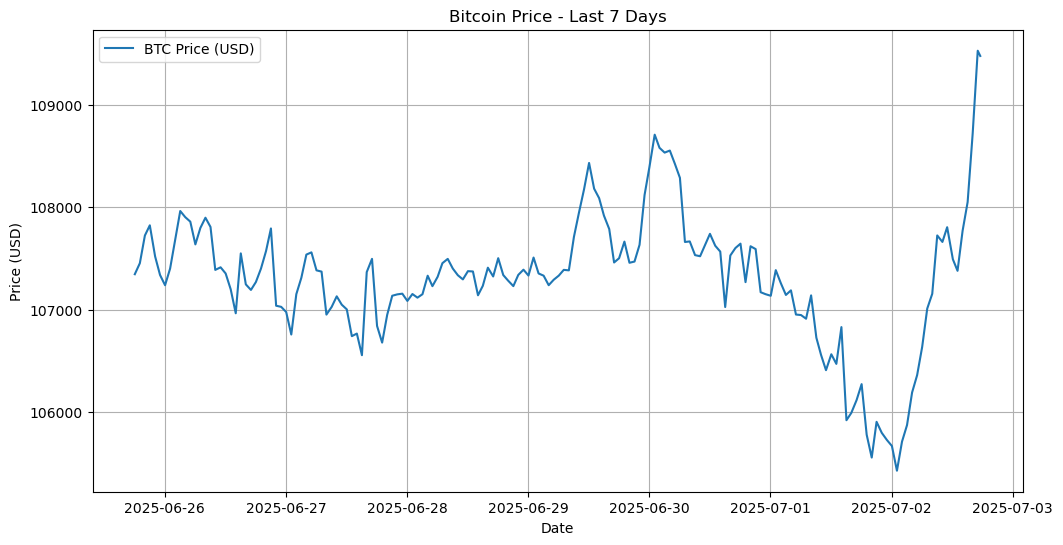

In [43]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    "vs_currency": "usd",
    "days": "7"
}
res = requests.get(url, params=params)
price_data = res.json()

prices = price_data["prices"]
df_prices = pd.DataFrame(prices, columns=["timestamp", "price"])
df_prices["timestamp"] = pd.to_datetime(df_prices["timestamp"], unit='ms')

plt.figure(figsize=(12,6))
plt.plot(df_prices["timestamp"], df_prices["price"], label="BTC Price (USD)")
plt.title("Bitcoin Price - Last 7 Days")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


# Bitcoin Analysis Summary

In this study, detailed information about Bitcoin was analyzed using CoinGecko's free and open API. The prominent results supported by both textual and visual outputs are presented below.

---

## Description Summary

> Bitcoin is the first successful internet money based on peer-to-peer technology; whereby no central bank or authority is involved in the transaction and production of the Bitcoin currency...

Bitcoin is a decentralized and open-source digital currency. Anyone can examine the source code and contribute to the development process.

---

## WordCloud from the Description

The most prominent words according to the word cloud generated from Bitcoin's official description:

**bitcoin**, **currency**, **peer**, **central**, **transaction**, **authority**, **internet**, **source**, **project**, **created**

These words reflect Bitcoin's technological and economic philosophy.

---

## Community and Developer Interaction

| Platform | Number |
|-----|--------------|
| Twitter Followers| No data |
| Reddit Subscribers | - |
| GitHub Stars | 75K+ |
| GitHub Forks | 35K+ |

As can be seen, Bitcoin's developer support on GitHub is very high. Although Twitter data does not come from the API, it is known that it has millions of followers from external sources.

---

## Categories

Bitcoin is included in the following categories:
- Smart Contract Platform
- Layer 1 (L1)
- Proof of Work (PoW)
- Bitcoin Ecosystem
- GMCI Index
- Coinbase 50 Index

---

## Supply Information

- Maximum Supply: 21,000,000 BTC
- Circulating Supply: 19,858,900 BTC
- Circulation Rate: **%94.69**

Almost all of Bitcoin's supply has entered circulation. This is an important indicator for long-term investors.

---

## Conclusion

Thanks to this analysis, Bitcoin's:
- Basic definition
- Community strength
- Developer activity
- Supply dynamics
- Thematic highlights in its description

are revealed in detail.

> This project was implemented with CoinGecko API, images were prepared with WordCloud and Matplotlib.

## ___________________________________________________________________________________________________________

## Dynamic Coin Analysis and Price Prediction with CoinGecko API

This Python script performs detailed analysis and price prediction via CoinGecko API based on a coin ID entered by the user. It includes the following steps:

### 1️ Required Libraries
- `requests`, `pandas`, `matplotlib`, `sklearn`, `numpy`: Basic tools for data extraction, analysis and visualization.

### 2️ Coin ID Entry
Coin ID is obtained from the user (for example: `bitcoin`, `ethereum`, `solana`).

### 3️ Basic Information About Coin
- Description (first 500 characters)
- Most used words (written frequency instead of WordCloud)
- Community data: Twitter followers, Reddit subscribers
- Developer data: GitHub stars & forks
- Categories
- Supply data: Maximum supply, circulating supply and circulation rate

### 4️ Daily Price Data
- 7-day prices are drawn.
- Shown with a line plot.

### 5️ Simple Price Prediction (Linear Regression)
- A prediction is made for the next 3 days based on the last 7 days of data.
- Model used: `LinearRegression` (sklearn)

### 6️ Prediction Accuracy
- R² score
- Mean Absolute Error (MAE)
- RMSE (Root Mean Square Error)

### 7️ Long-Term Charts
- Price charts for the last 30 days and the last 1 year are drawn separately.
- Separated by colors:

- Orange: 30-day chart
- Green: 1-year chart

---
This project uses the CoinGecko API to provide both technical and fundamental analysis with dynamic data extraction. It is especially ideal for producing coin-based content, observing investment trends, or as a data science project.

---

Enter the coin ID you want to analyze (e.g., bitcoin, ethereum, solana):  ethereum



 Description (first 500 characters):
Ethereum is a global, open-source platform for decentralized applications. In other words, the vision is to create a world computer that anyone can build applications in a decentralized manner; while all states and data are distributed and publicly accessible. Ethereum supports smart contracts in which developers can write code in order to program digital value. Examples of decentralized apps (dapps) that are built on Ethereum includes tokens, non-fungible tokens, decentralized finance apps, len

 Most frequent words:
 - the: 10 times
 - to: 7 times
 - is: 6 times
 - in: 6 times
 - a: 5 times
 - decentralized: 5 times
 - of: 5 times
 - gas: 5 times
 - ethereum: 4 times
 - and: 4 times

 Community & Developer Info:
- Twitter Followers: N/A
- Reddit Subscribers: 0
- GitHub Stars: 44422
- GitHub Forks: 19618

 Categories: Smart Contract Platform, Layer 1 (L1), Ethereum Ecosystem, FTX Holdings, Multicoin Capital Portfolio, Proof of Stake (PoS), Alameda

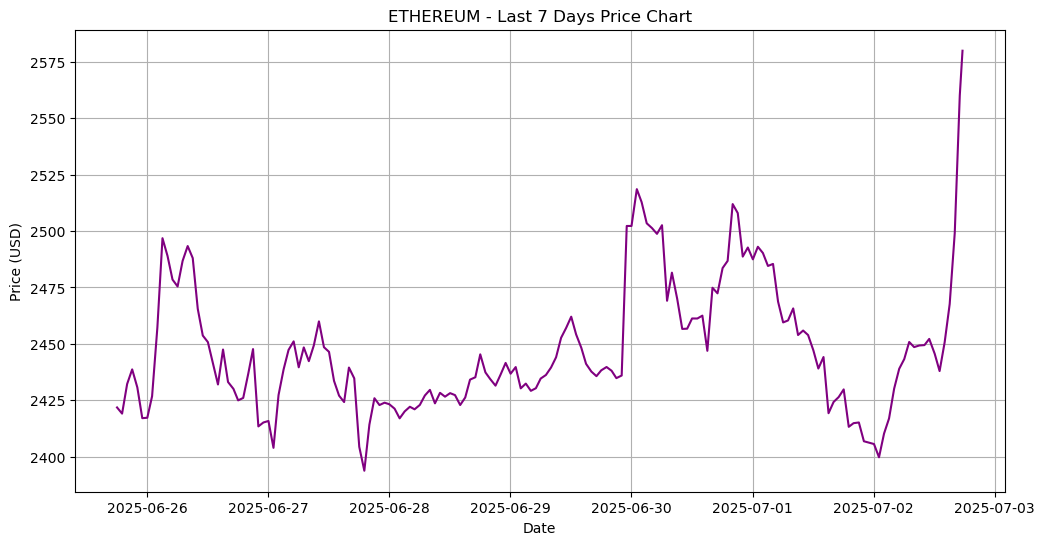


 ETHEREUM Price Forecast (Next 3 Days):
Day 1: $2466.60
Day 2: $2466.81
Day 3: $2467.01

 Prediction Accuracy (on Test Set):
- R² Score: -0.0540  (Closer to 1 is better)
- Mean Absolute Error (MAE): $30.85
- Root Mean Squared Error (RMSE): $38.00


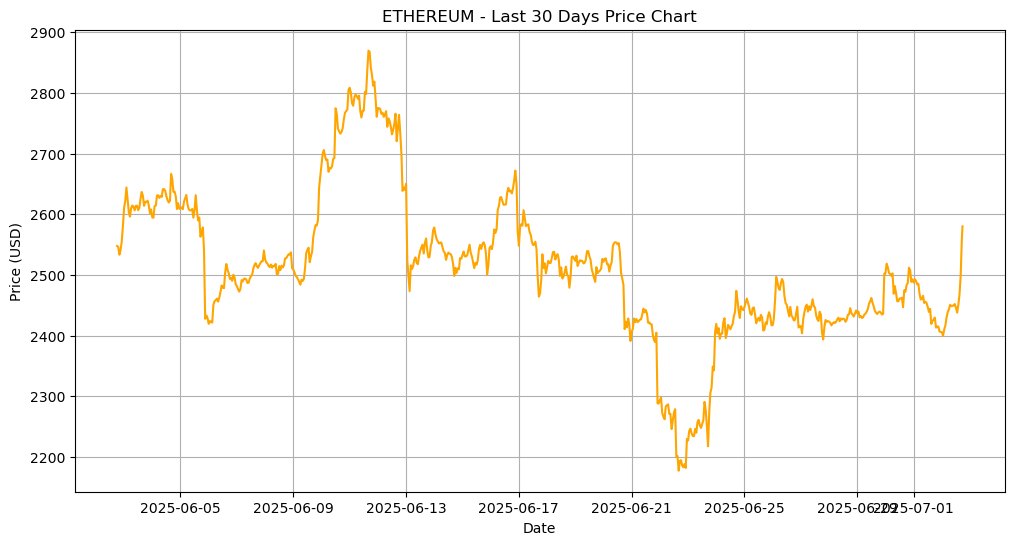

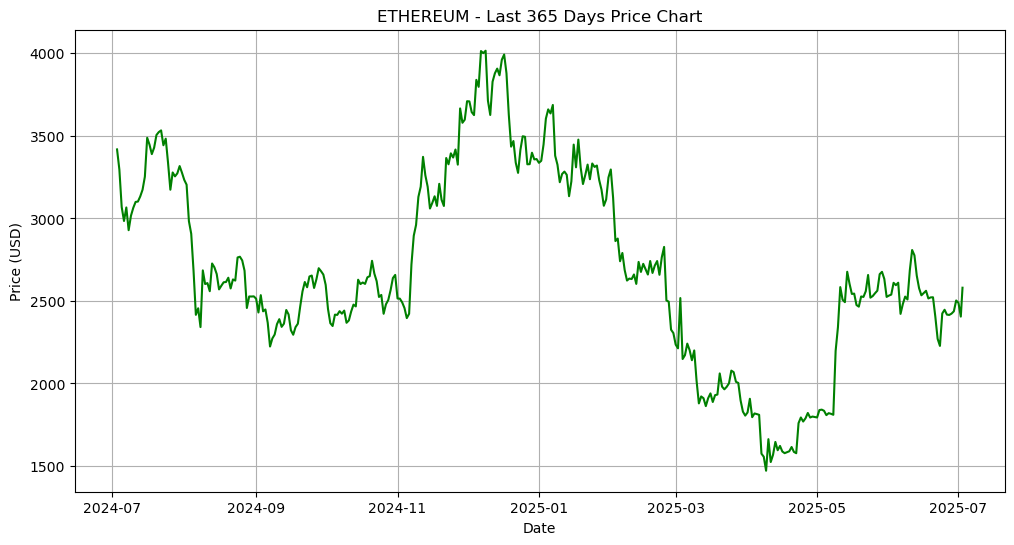

In [47]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Ask the user for a coin ID (e.g., bitcoin, ethereum, solana)
coin_id = input("Enter the coin ID you want to analyze (e.g., bitcoin, ethereum, solana): ").lower()

# Get the basic data of the selected coin
coin_url = f"https://api.coingecko.com/api/v3/coins/{coin_id}"
coin_response = requests.get(coin_url)

# If data is successfully retrieved
if coin_response.status_code == 200:
    coin_data = coin_response.json()

    # Get the English description and display the first 500 characters
    description = coin_data.get("description", {}).get("en", "Description not available.")
    print(f"\n Description (first 500 characters):\n{description[:500]}")

    # Show the 10 most frequent words in the description
    print("\n Most frequent words:")
    words = re.findall(r'\b\w+\b', description.lower())
    word_counts = Counter(words)
    for word, count in word_counts.most_common(10):
        print(f" - {word}: {count} times")

    # Display community and developer information
    twitter = coin_data.get("community_data", {}).get("twitter_followers", "N/A")
    reddit = coin_data.get("community_data", {}).get("reddit_subscribers", "N/A")
    stars = coin_data.get("developer_data", {}).get("stars", "N/A")
    forks = coin_data.get("developer_data", {}).get("forks", "N/A")

    print("\n Community & Developer Info:")
    print(f"- Twitter Followers: {twitter}")
    print(f"- Reddit Subscribers: {reddit}")
    print(f"- GitHub Stars: {stars}")
    print(f"- GitHub Forks: {forks}")

    #  Show coin categories
    categories = coin_data.get("categories", [])
    print("\n Categories:", ", ".join(categories) if categories else "No categories available")

    # 🔹 Display supply data
    max_supply = coin_data.get("market_data", {}).get("max_supply", None)
    circulating_supply = coin_data.get("market_data", {}).get("circulating_supply", None)

    print("\n Supply Information:")
    print(f"- Max Supply: {max_supply}")
    print(f"- Circulating Supply: {circulating_supply}")
    if max_supply and circulating_supply:
        ratio = (circulating_supply / max_supply) * 100
        print(f"🔹 Circulation Ratio: %{ratio:.2f}")

    # Get 7-day price data
    print(f"\n {coin_id.upper()} - 7-Day Price Chart & Forecast:")
    chart_url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    chart_params = {"vs_currency": "usd", "days": "7"}
    chart_response = requests.get(chart_url, params=chart_params)

    if chart_response.status_code == 200:
        prices = chart_response.json()["prices"]
        df = pd.DataFrame(prices, columns=["timestamp", "price"])
        df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms')

        # Plot the 7-day price chart
        plt.figure(figsize=(12,6))
        plt.plot(df["timestamp"], df["price"], color="purple")
        plt.title(f"{coin_id.upper()} - Last 7 Days Price Chart")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.grid(True)
        plt.show()

        # Price prediction for the next 3 days using Linear Regression
        df["day_number"] = np.arange(len(df))
        X = df["day_number"].values.reshape(-1, 1)
        y = df["price"].values.reshape(-1, 1)

        # Split into training and test sets (no shuffle for time series)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict prices for the next 3 days
        future_days = np.arange(len(df), len(df)+3).reshape(-1, 1)
        predictions = model.predict(future_days)

        print(f"\n {coin_id.upper()} Price Forecast (Next 3 Days):")
        for i, price in enumerate(predictions, 1):
            print(f"Day {i}: ${price[0]:.2f}")

        # Evaluate prediction accuracy on the test set
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)

        print("\n Prediction Accuracy (on Test Set):")
        print(f"- R² Score: {r2:.4f}  (Closer to 1 is better)")
        print(f"- Mean Absolute Error (MAE): ${mae:.2f}")
        print(f"- Root Mean Squared Error (RMSE): ${rmse:.2f}")

        # Plot charts for 30 and 365 days
        def get_and_plot_price(coin_id, days, color):
            url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
            params = {"vs_currency": "usd", "days": days}
            response = requests.get(url, params=params)

            if response.status_code == 200:
                prices = response.json()["prices"]
                df = pd.DataFrame(prices, columns=["timestamp", "price"])
                df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")

                plt.figure(figsize=(12, 6))
                plt.plot(df["timestamp"], df["price"], color=color)
                plt.title(f"{coin_id.upper()} - Last {days} Days Price Chart")
                plt.xlabel("Date")
                plt.ylabel("Price (USD)")
                plt.grid(True)
                plt.show()
            else:
                print(f" Could not retrieve data for the last {days} days")

        get_and_plot_price(coin_id, 30, "orange")
        get_and_plot_price(coin_id, 365, "green")
    else:
        print("Price data could not be retrieved.")
else:
    print("Invalid Coin ID or data could not be retrieved.")
